In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the to your gitHub repo

### <p style="text-align: left;"> &#9989; Obaid Elshafiey: </p>

## Create a new Virtual environment 

In [ ]:
# create a virtual environemtn 
#python -m venv .ANN1
# .ANN1\Scripts\Activate.ps1
# .ANN1\Scripts\activate.bat

# pip install matplotlib seaborn statsmodels scipy scikit-learn

In [ ]:
# python -m pip install --upgrade pip setuptools wheel

# CPU-only PyTorch (compatible with most Windows machines)
# python -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# other required packages
# python -m pip install numpy matplotlib seaborn statsmodels scipy scikit-learn tqdm torcheval

# python -m pip freeze > requirements.txt

# python -m pip install -r requirements.txt




In [1]:

import sys
packages = ["numpy","torch","torchvision","torcheval","matplotlib","seaborn","statsmodels","scipy","sklearn","tqdm"]
for p in packages:
    try:
        m = __import__(p)
        print(p, "OK", getattr(m, "__version__", "version unknown"))
    except Exception as e:
        print(p, "IMPORT ERROR:", e)
sys.exit(0)
PY

numpy OK 2.3.3
torch OK 2.9.1+cpu
torchvision OK 0.24.1+cpu
torcheval OK 0.0.7
matplotlib OK 3.10.7
seaborn OK 0.13.2
statsmodels OK 0.14.5
scipy OK 1.16.3
sklearn OK 1.7.2
tqdm OK 4.67.1


SystemExit: 0

d:\Users\obaid\OneDrive - Innovation University\3. Club Activities\working_on\Day05\Day05\.ANN1\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


---
# __Artificial Neural model_basework 1: In-Class__

<img src= "https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" width="80%">

The [Fashion MNIST dataset from Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist) we will be playing with today


## ___Learning objectives___

At the end of the exercise, you should be able to:
- Load existing Tensorflow dataset.
- Visualize image data as tensors.
- Build and train a simple ANN model.
- Understand loss and F1 and how they change over epochs.
- Change the model architure and understand its impacts.
- Evaluate an ANN model with test data.

---
## ___Outline___

1. [Review pre-class assignment](#preclass)
1. [Dataset and tensor](#dataset)
1. [Building an ANN classification model](#build)
1. [Train the model](#train)
1. [Impact of learning rate](#lr)
1. [Play with model architecture](#architecture)

----
<a id="preclass"></a>

## ___Pre-Club Assignment Review___

Did you watch the video before our meeting, did you have any questins about the video?


<font size=+3>&#9998;</font> Replace with your answer to the above question!

---
## ___Setup___

### _Important and key variables_

In [3]:
import numpy as np
import torchvision.datasets as datasets
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
from torcheval.metrics.functional import multiclass_f1_score
from helper_d22 import *

data_dir = './.data'

### _Repoducibility_

&#9989; **<font color=blue>DO THIS:</font>** For pytorch, the way to improve reproducibility is to set `manual_seed`. Run the cell below to set it.

Let's use the same `rand_seed` this time so we can directly compare our results later.

In [4]:

rand_seed = 240320

torch.manual_seed(rand_seed)

---
<a id="dataset"></a>
## ___Dataset and tensor___

### _Dataset content_

We will use the [Fashion MINST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) data set containing images of different kind of outfits. __Our goal here is to classify an image into one of 10 outfit class (e.g., Dress, Trouser, Shirt).__

&#9989; **<font color=blue>DO THIS:</font>** Load the dataset and write code to:
1. Show the type of train and test sets,
1. Show the dimension of train and test sets.

In [5]:
fashion_train_data = datasets.FashionMNIST(root=data_dir, train=True, 
                              download=True, transform=transforms.ToTensor())
fashion_test_data  = datasets.FashionMNIST(root=data_dir, train=False, 
                              download=True, transform=None)

X_train_all = fashion_train_data.data
y_train_all = fashion_train_data.targets
X_test = fashion_test_data.data
y_test = fashion_test_data.targets

# put your code below

In [6]:
## ANSWER

print(type(X_train_all), type(y_train_all), type(X_test), type(y_test))
print(X_train_all.shape, y_train_all.shape, X_test.shape, y_test.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])


### _Tensor_

If your code above is correct, then you must have seen that the data type of `X_train` is `torch.Tensor`.

__Tensor__ is just another name for data arrays. So here we just encountered a new data type `torch.Tensor` that comes with the package pytorch, just like the `np.array` datatype that comes with the package numpy. 

Similar to numpy, pytorch also defines a special set of commands that only apply to `torch.Tensor`. For example, the command for finding the minimal value of an np.array is `numpy.min`, but when you want to find the minimal value of an array stored as type `torch.tensor`, you should use `torch.min` instead. 

&#9989; **<font color=blue>DO THIS:</font>** Write code to:

- Print out the min and max values in `X_train_all`.
- Print out the unique values in `y_train_all` (use `torch.unique`).
- Print out the shape of the 1st instance in `X_train_all`.
- Create a variable called `class_names` with `fashion_train_data.classes` and print it out.

In [9]:
# put your code below

In [10]:
## ANSWER

print("X_train_all:", 
      "\n  min=",torch.min(X_train_all), 
      "\n  max=",torch.max(X_train_all))
print("y_train_all unique val:", 
      "\n ", torch.unique(y_train_all))
print("X_train instance shape:",
      "\n ", X_train_all[0].shape)

class_names = fashion_train_data.classes
print(class_names)

X_train_all: 
  min= tensor(0, dtype=torch.uint8) 
  max= tensor(255, dtype=torch.uint8)
y_train_all unique val: 
  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
X_train instance shape: 
  torch.Size([28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### _Dataset and preprocessing_

In this dataset:
- There are 60,000 training images.
- There are 10,000 testing images.
- Each image is a 28x28 pixel image.
- Each pixel has a value from 0 to 255.
- Pixel values in these images are features.
- There are 10 classes with names from 0 to 9.

Since we are using laptop computer for this exercise and most do not have good GPU, we will use only a small subset of the data:

- 500 images of the training data for training,
- 500 images of the training data for validation,
- The testing data is untouched.
- We have 10 classes, so each class has exactly 50 images in training and validation.
- We need to normalize the data (the original feature values are from 0 to 255) to [0,1].

&#9989; **<font color=blue>DO THIS:</font>**  Since the above are not a core learning objective, codes from doing all the above is wrapped into a helper function `get_subset`. Check out the docstring of this function to see what it is doing.

In [11]:
help(get_subsets)

Help on function get_subsets in module helper_d22:

get_subsets(data_dir, train_valid_size=200)
    Get training, validation, and test data
    Args:
      data_dir (str or Path): the directory to store the data
      train_valid_size (int): the number of images for training and validation
    Return:
      X_train (torch.Tensor): training images, defined by train_valid_size
      X_valid (torch.Tensor): validation images, defined by train_valid_size
      X_test (torch.Tensor): test images, all 6000 images per class
      y_train (torch.Tensor): training labels
      y_valid (torch.Tensor): validation labels
      y_test (torch.Tensor): test labels
      class_names (list): the names of the classes




&#9989; **<font color=blue>DO THIS:</font>**  Run the following cell to use the helper funciton `get_subset` to:
- Transform the data,
- Get the transformed train, validation, and test dataset.

In [7]:
X_train, X_valid, X_test, y_train, y_valid, y_test, class_names = \
                                    get_subsets(data_dir, train_valid_size=50)

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

(torch.Size([500, 28, 28]),
 torch.Size([500, 28, 28]),
 torch.Size([60000, 28, 28]),
 torch.Size([500]),
 torch.Size([500]),
 torch.Size([60000]))

&#9989; **<font color=blue>DO THIS:</font>** Write code below to check the max and min values in training, validation, and test sets.

In [13]:
# put your code here

In [14]:
## ANSWER

print(torch.min(X_train), torch.max(X_train))
print(torch.min(X_valid), torch.max(X_valid))
print(torch.min(X_test), torch.max(X_test))

tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


---
<a id="build"></a>
## ___Building an ANN classification model___

### _Checking your hardware_

Training ANN is typically computationally extensive and usually requires a Graphical Processing Unit (GPU, graphics card). Most of your laptops however have weak GPUs that are not suitable for training.

&#9989; **<font color=blue>DO THIS:</font>** Run the following cell to determine if GPU is available and, if not, use CPU.

In [8]:
print("gpu is available:", torch.cuda.is_available())

gpu is available: False


In [17]:
# I am using CPU here. But if you have gpu, try it.
device = torch.device("cpu")

print("Using device:", device)

Using device: cpu


### _Defining an nn.Module subclass_

We define our neural model_basework in Pytorch by
- subclassing `nn.Module`, and 
- initializing the neural model_basework layers in __\_\_init\_\___.
- Every `nn.Module` subclass implements the operations on input data in the __forward__ method.

Let's create a base model with the following layers and activation function:
- __nn.Flatten__: The first, input layer with:
  - input: tensor of 3 dimensions
  - output: tensor of 2 dimensions with the last 2 flattened
- __nn.Linear__: the 2nd-4th layers, the first two are hidden layer and the last is the output layer.
  - Applies a linear transformation on the input using its stored weights and biases.
  - I its simplest form take two paramters:
  - `num_input_nodes`: The number of nodes in the previous layer, 
  - `num_output_nodes`: The number of nodes in the current layer.
    - Let's have 300, 100, and 10 output nodes for the 2nd, 3rd, and 4th layers, respectively.
- __nn.ReLU__: Rectified Linear Unit
  - Applied after linear transformations to introduce nonlinearity, helping neural model_baseworks learn a wide variety of phenomena.
  - In this model, we use nn.ReLU between our linear layers, but there’s other activations.
  - Below is a comparison of the output from sigmoid and ReLU.

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*XxxiA0jJvPrHEJHD4z893g.png" width=600 />

- __nn.Softmax__: generate a [`softmax`](https://en.wikipedia.org/wiki/Softmax_function) output
  - The last linear layer of the neural model_basework returns logits - raw values in [-infty, infty],
  - Logits are passed to the nn.Softmax module and scaled to values [0, 1] like probabilities that shows how likely the current image is in each of the classes. 
  - The predicted label would then be the class with the highest probability. 
  - For some historical reason, instead of just using the `softmax` function, we use the logrithm of it, which is essentially the same, as it does not change the ranking of the probabilities. 

&#9989; **<font color=blue>DO THIS:</font>** In the code cell below, fill in the missing parameters (??) and missing comments based on the above.

In [ ]:
# nn is torch.nn.
# F is torch.nn.functional.

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(784,500) # comment
    self.fc2 = nn.Linear(??,??)  # comment
    self.out = nn.Linear(??,??)  # comment
    
  def forward(self,x):
    x = self.flatten(x)          # dimension?
    x = F.relu(self.fc1(x))      # dimension?
    x = F.relu(self.fc2(x))      # dimension?
    x = F.relu(self.out(x))      # dimension?
    x = F.log_softmax(x,dim=1)   # dimension?
    
    return x

In [9]:
## ANSWER

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(784,500) # fully connected (fc) hidden layer
    self.fc2 = nn.Linear(500,500)
    self.out = nn.Linear(500,10)
        
  def forward(self,x):
    # return a tensor with the same data but of a different shape
    #x = x.view(x.shape[0],-1)  
    x = self.flatten(x)        # [2000, 784]

    # Applies the ReLU function element-wise for each hidden layer
    x = F.relu(self.fc1(x))    # [2000, 500]]
    x = F.relu(self.fc2(x))    # [2000, 500]
    x = F.relu(self.out(x))    # [2000, 10]
    # Applies the Softmax function to an n-dimensional
    x = F.log_softmax(x,dim=1) # [2000, 10]
    return x

&#9989; **<font color=blue>DO THIS:</font>** Run the following that:

- Constructs a baseline model object `model_base` from the `Classifer` class we just defined, so we have an actual, untrained model_basework!
- We call this "baseline" because we are not tuning any of the parameters and is just using it as is.
- Summarizes the structure of the model_basework you just created. 

In [10]:
model_base = Classifier()

print(model_base)

Classifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (out): Linear(in_features=500, out_features=10, bias=True)
)


&#9989; **<font color=blue>DO THIS:</font>**  Run the cell below to get the total nuimber of  parameters (weights+bias).

In [11]:
total_num_param     = sum(p.numel() for p in model_base.parameters())
total_num_trainable = sum(p.numel() for p in model_base.parameters() if p.requires_grad)

print(total_num_param, total_num_trainable)

648010 648010


### _How well would an untrained model do?_

We have not train the model yet and all the parameters are randomly initiated.

&#9989; **<font color=blue>DO THIS:</font>** Comment on the following code and make sure you understand what each line is doing and run the code block to get how well an untrained model would do in classifying the images.


In [12]:
# comment
y_train_naive_pred = model_base(X_train)

# comment
y_valid_naive_pred = model_base(X_valid)

# comment
train_naive_f1 = multiclass_f1_score(
      y_train_naive_pred.argmax(dim=1),  # comment
      y_train,                           # comment
      num_classes=len(class_names),      # comment
      average='macro'                    # comment
      )

# comment
valid_naive_f1 = multiclass_f1_score(
      y_valid_naive_pred.argmax(dim=1), 
      y_valid,
      num_classes=len(class_names),
      average='macro'
      )

print("Naive train F1:", train_naive_f1.detach().numpy())
print("Naive valid F1:", valid_naive_f1.detach().numpy())

Naive train F1: 0.026151583
Naive valid F1: 0.033768814


&#9989; <font color=red>**QUESTION:**</font> Explain why the training and validation F1 values of untrained models look like these.

<font size=+3>&#9998;</font> Replace with your answer to the above question!

##### ANSWER

F1 score is the hormonic means between precision ($P$) and recall ($R$):

$$F1 = \frac{2}{P^{-1} + R^{-1}} = 2\frac{P \cdot R}{P + R}$$

In multi-class situation, an F1 score is caulculated for each class $i$, so:

$$F1_i = 2\frac{P_i \cdot R_i}{P_i + R_i}$$

Then, we average the F1 scores of all classes (`average='micro'`).

For class $i$ if we just make random predictions, $P_i=0.1$ regardless of what $R_i$ is. Since in both training and validation, each class is 10% of the dataset. Thus, the expected $R_i$ is also 0.1. So the F1 for class $i$ in a naive model would be:

$$F1_{i,naive} = 2\frac{0.1 \cdot 0.1}{0.1 + 0.1} = 0.1$$

Average across all classes, we will get 0.1 as the baseline F1. The result is lower than randomly expected potentially due to the stochastic nature of weight initialization.

---
<a id="train"></a>

## ___Train the model___

### _Required components_

Once a model is initiated, the next step is to train it with our taining data.

&#9989; **<font color=blue>DO THIS:</font>** The following is an implemention of the `train` function. 

__Study each line carefully and understand what it does.__


In [13]:
def train(model_base, X_train, y_train, X_valid, y_valid, epochs=100, lr=0.01, wd=0.0,
          model_name=""):
  '''Train the artificial neural model_basework
  Args:
    model_base (torch.nn.Module): the neural model_basework to be trained
    X_train (torch.Tensor): the input data for training
    y_train (torch.Tensor): the input labels for training
    X_valid (torch.Tensor): the input data for validation
    y_valid (torch.Tensor): the input labels for validation
    epochs (int): the number of epochs, default 100
    lr (float): the learning rate, default 0.01
    wd (float): the weight decay, default 0.0
    model_name (str): the name of the model to be saved, if empty, no save
  Returns:
    epoch_loss (list): the loss after each epoch
    epoch_f1 (list): the f1 score after each epoch
  '''
  ## IMPORTANT ##
  # pick a metric to measure the goodness of fit: negative log likelihood loss
  criterion = nn.NLLLoss()

  ## IMPORTANT ##
  # Pick a training algorithm that iteratively minimizes the loss
  # Here, we pick stochastic gradient descent from torch.optim
  optimizer = optim.SGD(model_base.parameters(), lr=lr, weight_decay=wd)

  # list to store the loss and f1 after each epoch
  epoch_loss = []
  epoch_f1 = []

  ## IMPORTANT ##
  # start training, update weights and bias.
  model_base.train()

  # go through the epochs
  for e in tqdm(range(epochs)):
    ## IMPORTANT ##
    # clear previously stored gradients if any
    optimizer.zero_grad()

    ## IMPORTANT ##
    # compute the output of the model_basework given the input data
    y_train_pred = model_base(X_train)
    y_valid_pred = model_base(X_valid)

    ## IMPORTANT ##
    # compute the difference between the predicted and true labels
    train_loss = criterion(y_train_pred, y_train)
    valid_loss = criterion(y_valid_pred, y_valid)

    # store the epoch and loss info
    epoch_loss.append([e, train_loss, valid_loss])

    # compute the multiclass f1 score for training and validation data
    train_f1 = multiclass_f1_score(y_train_pred.argmax(dim=1), y_train,
                                   num_classes=10, average='macro')
    valid_f1 = multiclass_f1_score(y_valid_pred.argmax(dim=1), y_valid,
                                   num_classes=10, average='macro')

    # store the epoch and f1 score
    epoch_f1.append([e, train_f1, valid_f1])

    ## IMPORTANT ##
    # compute the gradient of the loss function with respect to the parameters
    # based on the training loss **NOT** validation loss and stored the gradient
    # in `parameter.grad`
    train_loss.backward()

    ## IMPORTANT ##
    # update all the parameters stored in `parameter.grad`
    optimizer.step()

  # save the model
  if model_name != "":
    torch.save(model_base, model_name)

  return epoch_loss, epoch_f1

&#9989; <font color=red>**QUESTION:**</font> After examine the training function above:

- What is `nn.NLLLoss`? What is it used for?
- What is `optim.SGD`? What is it used for?
- Why do we need to do `optimizer.zero_grad()`?
- What is the line that define a forward pass thorugh the neural model_basework?
- What are the lines that define back propagataion?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

##### ANSWER

- `nn.NLLLoss` is the negative log likelihood loss which is the loss function used to determine how different the training or validation label is from the true label.
- `optim.SGD` is the stochastic gradient descent optimizer used for determining how weights should be modified during back propagation.
- `optimizer.zero_grad()` is used to clear out the gradients of all weights that the optimizer is tracking.
- Forward pass is when `model_base` is called. E.g., `y_train_pred = model_base(X_train)`.
- The lines define back propagation include:
  - `train_loss.backward()`
  - `optimizer.step()`

&#9989; **<font color=blue>DO THIS:</font>** Write code to train the `model_base` model with 750 epochs, learning rate of 0.05, and weight decay (wd) of 0.0.

In [20]:
# put your code here

In [14]:
## ANSWER

epoch_loss_base, epoch_f1_base = train(model_base, X_train, y_train, X_valid, y_valid, 
                                  epochs=750, lr=0.05, wd=0.0)

100%|██████████| 750/750 [00:23<00:00, 31.57it/s]


### _Examine training and validation losses and F1s_

&#9989; <font color=blue>**DO THIS:**</font> Run `plot_train_valid_score` to plot the training and validation losses and F1s over epochs.

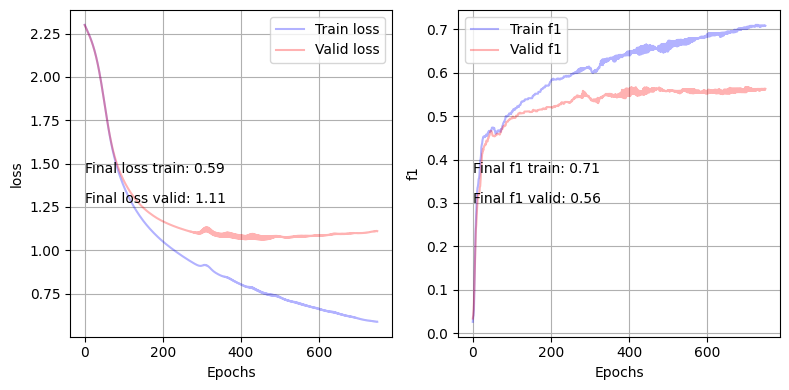

In [15]:
plot_train_valid_scores(epoch_loss_base, epoch_f1_base)

&#9989; <font color=red>**QUESTION:**</font> How do you interpret the figures above? Why do the red line sit above the blue one when plotting loss but below when plotting F1? do you think the number of iterations we set is enough for the training loss to reach its minimum?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

##### ANSWER

- Loss
  - The lower the loss, the better.
  - Traning loss is lower than validation loss because the model is somewhat overfitted to the training data.
- F1 score
  - The higher the F1, the better.
- No sure, the validation loss seems to increase at the end of the training process.

### _Continue training_

The `model_base` model object contains updated weights and biases at the end of the training process. We can continue training it by call the train function again.

&#9989; <font color=blue>**DO THIS:**</font> In the cell below, write code that will:

- Train the `model_base` model for another 1000 epochs, with all the same parameters,
- call the returned objects `epoch_loss_2`, and `epoch_f1_2`,
- Plot both losses and F1.


In [23]:
# put your code here

100%|██████████| 1000/1000 [00:19<00:00, 51.67it/s]


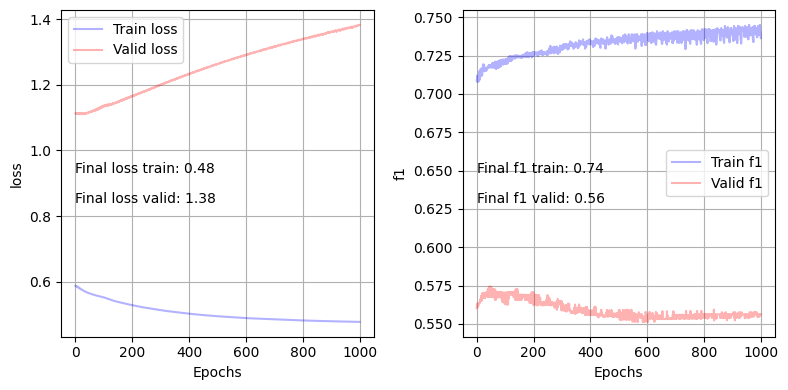

In [24]:
## ANSWER

epoch_loss_base_contd, epoch_f1_base_contd = train(
  model_base, X_train, y_train, X_valid, y_valid, epochs=1000, lr=0.05, wd=0.0)
plot_train_valid_scores(epoch_loss_base_contd, epoch_f1_base_contd)

&#9989; <font color=red>**QUESTION:**</font> What's your interpretation of the above results? Why does the loss and F1 fluctuate so much?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

##### ANSWER

- Loss:
  - Training loss continue to improve, but the validation loss has in fact starting to get worse.
- F1:
  - Despite the fact that validation loss is not improving, the F1 continue to improve.
- This demonstrates the impact of scoring function when training a neural model_basework. A proper function needs to be chosen that best suit what we are interested in doing.
- The fluctuation is likely because the learning rate is too large so every time the weight changes are too great that lead to the fluctuation.

---
<a id="lr"></a>

## ___Impact of learning rate___

As demonstrated earlier that there are quite a lot of fluctuation in loss and F1 over epochs. This is most likely due to poor learning rate choice. 

&#9989; <font color=blue>**DO THIS:**</font> To test this:

- Go to [this Google sheet](https://docs.google.com/spreadsheets/d/1f1H7ZedtMr02POAAMoZEDGYCHp4O2YpIzyHuyUmmEHs/edit#gid=1610218136), pick a learning rate you'd like to test and put your name next to it.
- Intialize a new `Classifier` object and call it `model_lr_test`,
- Use the same parameters as before to train `model_lr_test` except use the learning rate you have chosen and run for 2000 epochs.
- Plot the results,
- Share your loss and F1 results using the `Learning rate` tab of [the Google sheet]((https://docs.google.com/spreadsheets/d/1f1H7ZedtMr02POAAMoZEDGYCHp4O2YpIzyHuyUmmEHs/edit#gid=1610218136)), and copy and past your plot in [this Google slide](https://docs.google.com/presentation/d/1Crh28_W-pEmHQM1pDH7bImWLH6y1w4u1OWtN8M5kOm8/edit#slide=id.g2c728e6d46c_0_0).

In [25]:
# put your code here

100%|██████████| 5000/5000 [01:39<00:00, 50.28it/s]


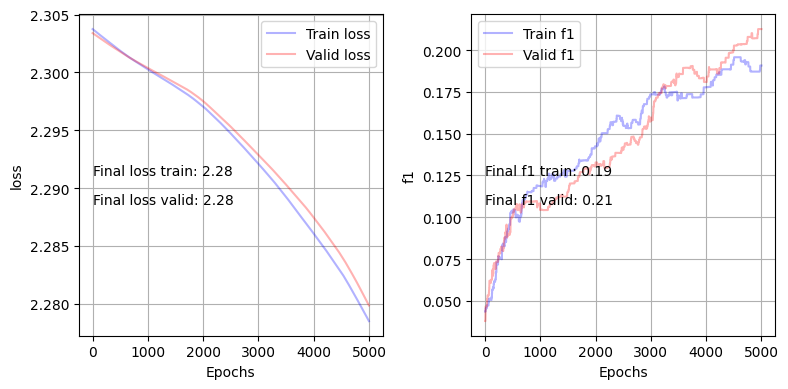

In [27]:
## ANSWER

lr = 0.0001
epochs = 5000

model_lr = Classifier()
epoch_loss_lr, epoch_loss_lr = train(model_lr, X_train, y_train, X_valid, y_valid, 
                               epochs=5000, lr=lr, wd=0.0)
plot_train_valid_scores(epoch_loss_lr, epoch_loss_lr)

&#9989; <font color=red>**QUESTION:**</font> What learning rate would you pick for this specific problem based on the results from your classmates?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

---
<a id="architecture"></a>

## ___Play with model architecture___

The `Classifer` class specifies an architecture with:
- An flattened, input layer (`flatten`),
- A linear layer with 500 nodes (`fc1`),
- A linear layer with 500 nodes (`fc2`),
- A linear layer with 10 nodes (`out`),
- A softmax layer with 10 nodes (`softmax`). 

&#9989; <font color=blue>**DO THIS:**</font> In the following cell:

- Modify the `Classifer` class and call it `Classifer_mine`, create a new model architecture of your choice.
  - I.e., change the number of layers and nodes,
  - But leave `flatten`, `out`, and `softmax` unchanged,
  - Also leave the total number of nodes to be 1000.
- Create a new model with `Classifier_min` with a learning rate of 0.05 for 1750 epochs.
- Share your model architecture info, loss and F1 results in the `Model architecture` tab of [the Google sheet]((https://docs.google.com/spreadsheets/d/1f1H7ZedtMr02POAAMoZEDGYCHp4O2YpIzyHuyUmmEHs/edit#gid=1610218136)), and copy and past your plot in [this Google slide](https://docs.google.com/presentation/d/1Crh28_W-pEmHQM1pDH7bImWLH6y1w4u1OWtN8M5kOm8/edit#slide=id.g2c728e6d46c_0_0).

In [ ]:
# put your code here

100%|██████████| 1750/1750 [01:02<00:00, 28.03it/s]


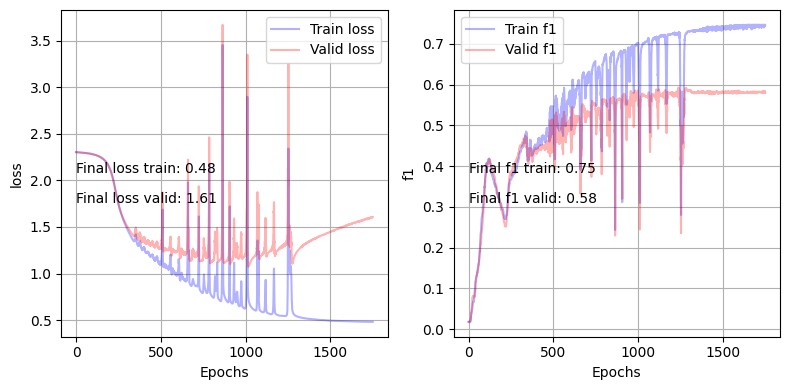

In [32]:
## ANSWER

class Classifier_mine1(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(784,500)
    self.fc2 = nn.Linear(500,300)
    self.fc3 = nn.Linear(300,100)
    self.fc4 = nn.Linear(100,100)
    self.out = nn.Linear(100,10)
        
  def forward(self,x):
    x = self.flatten(x)   
    x = F.relu(self.fc1(x)) 
    x = F.relu(self.fc2(x)) 
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.out(x)) 
    x = F.log_softmax(x,dim=1)
    return x

model_mine1 = Classifier_mine1()
epoch_loss_mine1, epoch_f1_mine1 = \
  train(model_mine1, X_train, y_train, X_valid, y_valid, epochs=1750, lr=0.05)
plot_train_valid_scores(epoch_loss_mine1, epoch_f1_mine1)

100%|██████████| 1750/1750 [01:00<00:00, 29.10it/s]


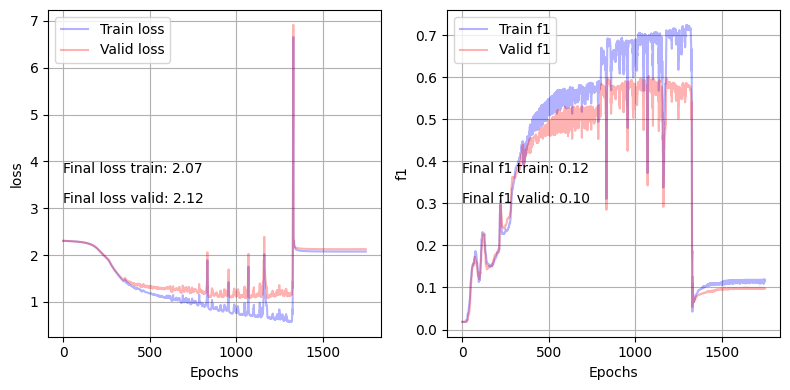

In [33]:
## ANSWER

class Classifier_mine2(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(784,100)
    self.fc2 = nn.Linear(100,100)
    self.fc3 = nn.Linear(100,300)
    self.fc4 = nn.Linear(300,500)
    self.out = nn.Linear(500,10)
        
  def forward(self,x):
    x = self.flatten(x)   
    x = F.relu(self.fc1(x)) 
    x = F.relu(self.fc2(x)) 
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.out(x)) 
    x = F.log_softmax(x,dim=1)
    return x

model_mine2 = Classifier_mine1()
epoch_loss_mine2, epoch_f1_mine2 = \
  train(model_mine2, X_train, y_train, X_valid, y_valid, epochs=1750, lr=0.05)
plot_train_valid_scores(epoch_loss_mine2, epoch_f1_mine2)

&#9989; <font color=red>**QUESTION:**</font> Take a look at thre results posted by yur classmates. Is there any general rule you may derived from how the model architecture should be defined?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

-----
### Congratulations, we're done!

## ___Appendix: potential issues___

Even with extremely reduced dataset, it may cause issues for laptops to execute all steps, particularly when the # of epochs is large.